In [129]:
import pandas as pd

# Load the JSON ttaining dataset
data = pd.read_json('loan_approval_dataset.json')

# view dataset
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [130]:
# review dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [131]:
# understand dataset columns
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


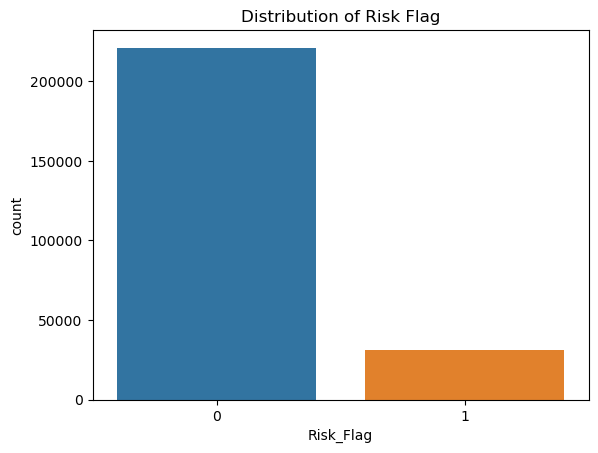

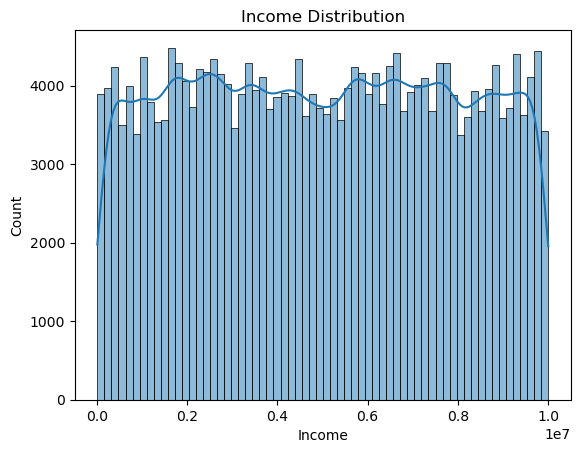

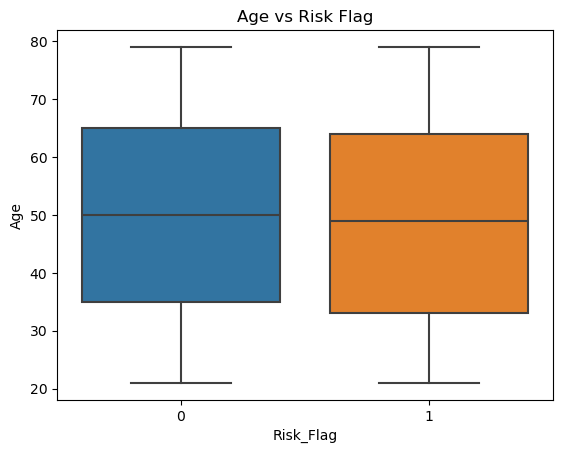

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Risk_Flag distribution
sns.countplot(x='Risk_Flag', data=data)
plt.title('Distribution of Risk Flag')
plt.show()

# Visualize Income distribution
sns.histplot(data['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

# Visualize the relationship between Age and Risk_Flag
sns.boxplot(x='Risk_Flag', y='Age', data=data)
plt.title('Age vs Risk Flag')
plt.show()

In [133]:
# Check for null data points
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [134]:
# checking training data target samples

df["Risk_Flag"].value_counts()

# Here non risky data is more & hence we should consider resample (upsampling or downsampling)
# But since we are creating model for financial use case, I choose to not resample and move forward with original data 
# Before considering resampling data, one must consult domain expert ***IMPORTANT

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [135]:
# Handle unrequired data
data.drop(columns=["Id"], inplace=True)

In [109]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [110]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [111]:
# Features indetification 
X = data.drop('Risk_Flag', axis=1) # independant features
y = data['Risk_Flag'] #dependant feature

In [136]:
# making sure dataset shapes are as expected
print(X.shape, y.shape)

(252000, 11) (252000,)


In [112]:
# Let's creates new features to capture non-linear relationships
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

In [113]:
from sklearn.model_selection import train_test_split

# Split train and test datasets for accurate model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Selecting RandomForestClassifier since we are building model to predict financial outcome with respect to non linear features
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Check Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate Classification Report
print('Classification Report:')
class_report = classification_report(y_test, y_pred)
print(class_report)

# Evaluate Confusion Matrix
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.8984920634920635
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400

Confusion Matrix:
[[41936  2211]
 [ 2905  3348]]


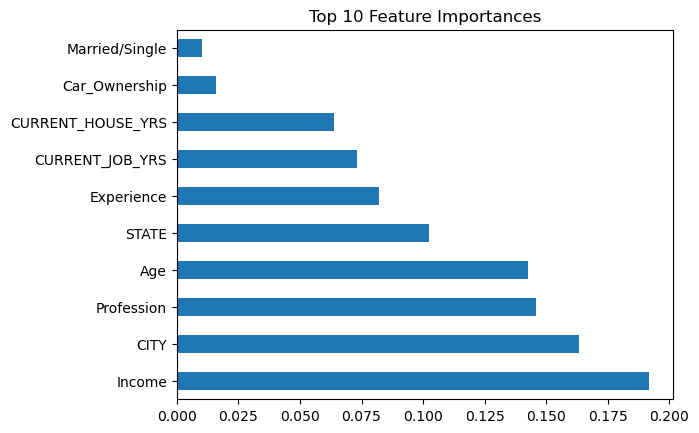

In [119]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [143]:
#Now will create report for about the dataset & model performace evaluation

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('report.pdf') as pdf:
    # Add each plot to the PDF
    plt.figure()
    sns.countplot(x='Risk_Flag', data=data)
    plt.title('Distribution of Risk Flag')
    pdf.savefig()
    plt.close()

    plt.figure()
    sns.histplot(data['Income'], kde=True)
    plt.title('Income Distribution')
    pdf.savefig()
    plt.close()

    plt.figure()
    sns.boxplot(x='Risk_Flag', y='Age', data=data)
    plt.title('Age vs Risk Flag')
    pdf.savefig()
    plt.close()

    plt.figure()
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    pdf.savefig()
    plt.close()
    
    plt.figure(figsize=(4, 3))
    plt.text(0.5, 0.5, f'Accuracy: {accuracy:.2f}', ha='center', va='center', fontsize=12)
    plt.axis('off')
    plt.title('Accuracy Score')
    pdf.savefig()
    plt.close()
    
    plt.figure(figsize=(6, 4))
    plt.text(0.1, 0.5, class_report, {'fontsize': 10}, fontfamily='monospace')
    plt.axis('off')
    plt.title('Classification Report')
    pdf.savefig()
    plt.close()
    
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    pdf.savefig()
    plt.close()
    

print("PDF report created successfully.")


PDF report created successfully.


In [125]:
import pickle

# Save the model to a file
with open('load_risk_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)